In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import tarfile
import re
import string 
from wordcloud import WordCloud
from PIL import Image
import requests

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve

# Import the data

https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [3]:
path="D:\\Personal\\Alex\\Uni\\MS IA\\1 Curso\\FALL\\Natural Language Processing\\Module 4\\Assignments\\Logistic Regression and Naive Bayes on Sentiment Analysis\\Input Data\\Reviews.csv"

In [4]:
input_data = pd.read_csv(path)

########################################
########### Just for testing ###########
########################################
#input_data = input_data.iloc[:10000]
########################################
########### Just for testing ###########
########################################

input_data_backup=input_data.copy()
input_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
input_data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [6]:
print("Nulls Score:",input_data.Score.isnull().sum())
print("Nulls Text:",input_data.Text.isnull().sum())

Nulls Score: 0
Nulls Text: 0


5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64


<AxesSubplot:>

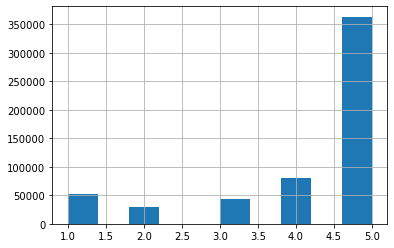

In [7]:
print(input_data.Score.value_counts())
input_data["Score"].hist()

## Modify the table to get one with this format:
text sentiment 

In [8]:
df=pd.DataFrame(columns=['text','sentiment'])

In [9]:
def add_review_to_df(original):
    global df
    df = original[['Text', 'Score']].copy() 
    df = df.replace([1, 2], 0)
    df = df.replace([4, 5], 1)
    df = df[df['Score'] != 3]
    df = df.rename(columns={"Text": "text", "Score": "sentiment"})

In [10]:
add_review_to_df(input_data)

df_backup=df.copy()

In [11]:
#df=df_backup.copy()

In [12]:
df

,text,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1
...,...,...
568449,Great for sesame chicken..this is a good if no...,1
568450,I'm disappointed with the flavor. The chocolat...,0
568451,"These stars are small, so you can give 10-15 o...",1
568452,These are the BEST treats for training and rew...,1


1    443777
0     82037
Name: sentiment, dtype: int64


<AxesSubplot:>

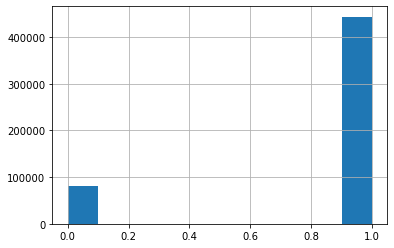

In [13]:
print(df.sentiment.value_counts())
df["sentiment"].hist()

In [14]:
#Make both categories the same size

df_copy=df[df["sentiment"]==0]

df_pos=df[df["sentiment"]==1]

df_copy=df_copy.append(df_pos.sample(frac=(len(df_copy.index)/len(df_pos.index))))

df=df_copy.sample(frac=1).reset_index(drop=True)
df

,text,sentiment
0,"couldn't stop laughing in the store, so just h...",0
1,Do not waste your money. Has only the faintest...,0
2,As a Senior citizen and diabetic who has loved...,0
3,"I've really enjoyed these cookies, and came to...",0
4,If you have never investigated what is in your...,1
...,...,...
164069,The food is GREAT. The cats have gotten compl...,0
164070,I saw people here complaining that the formula...,0
164071,I was so happy to find these after eating at a...,1
164072,This has been a fabulous addition to my health...,1


0    82037
1    82037
Name: sentiment, dtype: int64


<AxesSubplot:>

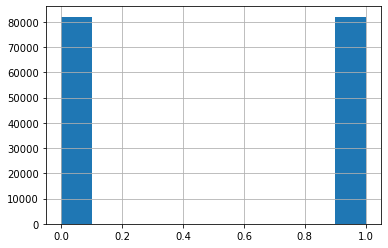

In [15]:
print(df_copy.sentiment.value_counts())
df_copy["sentiment"].hist()


#### • Clean-up (HTML, Unicode, contractions, Punctuation)
#### • Tokenizations / Multiword Expressions
#### • Lower Case
#### • Stemming / Lemmatization
#### • Stop Words 


In [16]:
#Download the spotwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#Clean Up
    #Remove <br />
    #Remove punctuation
    #Lower Case
def clean_up(text):
    
    #Remove <br />
    text = text.replace('<br />', '')
    
    #Remove Punctuation
    text= re.sub(r'\W',' ',text)
    
    #Lower Case
    text=text.lower()
    
    return (text)

#Tokenice the text
def tokenizations(text):
    
    ret=nltk.word_tokenize(text)
            
    return (ret)

#remove stopwords
def remove_stopwords(text):
    stopwords_var=set(stopwords.words('english'))
    ret=[]
    for elem in text:
        if (elem not in stopwords_var):
            ret.append(elem)
    return (ret)

#Stemmer
def stemming(text):
    stemmer_var=SnowballStemmer('english')
    ret=[]
    for elem in text:
        ret.append(stemmer_var.stem(elem))
    return (ret)

In [18]:
#data treatment
df['text']= df.apply(lambda elem: clean_up(elem['text']),axis=1)
print("Done Clean-Up")
df['text']= df.apply(lambda elem: tokenizations(elem['text']),axis=1)
print("Done tokenizations")
df['text']= df.apply(lambda elem: remove_stopwords(elem['text']),axis=1)
print("Done remove_stopwords")
df['text']= df.apply(lambda elem: stemming(elem['text']),axis=1)
print("Done stemming")

Done Clean-Up
Done tokenizations
Done remove_stopwords
Done stemming


In [19]:
df_clean_backup=df.copy()

In [20]:
df.dtypes

text         object
sentiment     int64
dtype: object

In [21]:
print("Nulls sentiment:",df.sentiment.isnull().sum())
print("Nulls text:",df.text.isnull().sum())

Nulls sentiment: 0
Nulls text: 0


In [22]:
df

,text,sentiment
0,"[stop, laugh, store, buy, smell, kinda, like, ...",0
1,"[wast, money, faintest, tast, chocol, tri, bev...",0
2,"[senior, citizen, diabet, love, peanut, brittl...",0
3,"[realli, enjoy, cooki, came, amazon, one, hard...",0
4,"[never, investig, dog, food, think, read, dri,...",1
...,...,...
164069,"[food, great, cat, gotten, complet, addict, am...",0
164070,"[saw, peopl, complain, formula, chang, seem, r...",0
164071,"[happi, find, eat, german, restaur, sampl, spa...",1
164072,"[fabul, addit, healthi, way, eat, alway, look,...",1


In [23]:
list_sentiment=[]
for i in df['text']:
    list_sentiment.append(" ".join(i))

In [24]:
list_sentiment_backup=list_sentiment.copy()

In [25]:
d = {'text': list_sentiment, 'sentiment': df['sentiment']}
df_wordcloud = pd.DataFrame(data=d)
df_wordcloud

,text,sentiment
0,stop laugh store buy smell kinda like bacon ta...,0
1,wast money faintest tast chocol tri beverag ho...,0
2,senior citizen diabet love peanut brittl expec...,0
3,realli enjoy cooki came amazon one hard find m...,0
4,never investig dog food think read dri dog foo...,1
...,...,...
164069,food great cat gotten complet addict amazon bo...,0
164070,saw peopl complain formula chang seem recent b...,0
164071,happi find eat german restaur sampl spaetzl no...,1
164072,fabul addit healthi way eat alway look ingredi...,1


# WORD CLOUDS

In [26]:
textglobal = " ".join(t for t in df_wordcloud.text)
textpositive = " ".join(t for t in df_wordcloud.text[df_wordcloud["sentiment"]==1])
textnegative = " ".join(t for t in df_wordcloud.text[df_wordcloud["sentiment"]==0])

## Word Cloud for all reviews

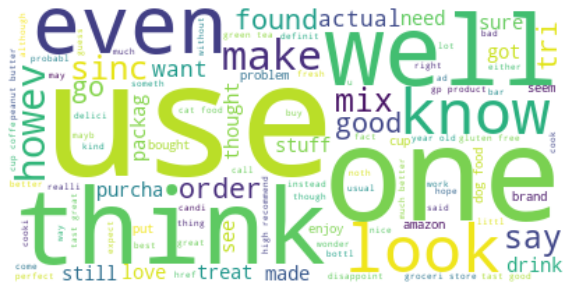

In [27]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(textglobal)

# Display the generated image:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for positive reviews

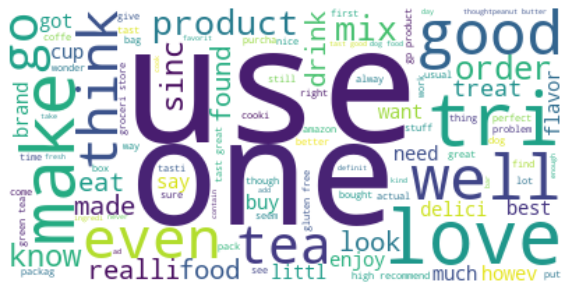

In [28]:

wordcloud = WordCloud(max_words=100, background_color="white").generate(textpositive)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for negative reviews

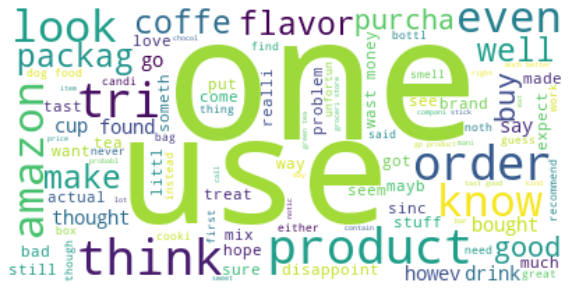

In [29]:

wordcloud = WordCloud(max_words=100, background_color="white").generate(textnegative)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bag of Words

In [30]:
#Create the bag of words
bag_of_words=CountVectorizer().fit_transform(list_sentiment)
bag_of_words.shape

(164074, 57159)

In [31]:
#Split the data. 70% for training 30% for test

x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(bag_of_words, df['sentiment'].astype('int'), test_size=0.30, random_state=0)

# TF-IDF

In [32]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(list_sentiment)
vectors.shape

(164074, 57159)

In [33]:
#Split the data. 70% for training 30% for test

x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(vectors, df['sentiment'].astype('int'), test_size=0.30, random_state=0)

# Naive Bayes with Bag of Words

In [34]:
#Use Multinomial Naive Bayes
mnb_BoW = MultinomialNB()
mnb_BoW.fit(x_train_bow,y_train_bow)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.89      0.86      0.87     57397
           1       0.86      0.90      0.88     57454

    accuracy                           0.88    114851
   macro avg       0.88      0.88      0.88    114851
weighted avg       0.88      0.88      0.88    114851

Confusion matrix:
[[49136  8261]
 [ 5929 51525]]
Accuracy:
0.876448616032947
ROC Curve:


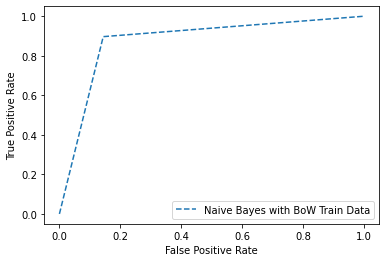

In [35]:
prediction_NB_with_bow=mnb_BoW.predict(x_train_bow)

print(metrics.classification_report(y_train_bow,prediction_NB_with_bow))
print("Confusion matrix:")
conMatrix_train_nb_bow=metrics.confusion_matrix(y_train_bow,prediction_NB_with_bow)
print(conMatrix_train_nb_bow)
print("Accuracy:")
accuracy_train_nb_bow=metrics.accuracy_score(y_train_bow,prediction_NB_with_bow)
print(accuracy_train_nb_bow)

print("ROC Curve:")
nb_with_bow_fpr, nb_with_bow_tpr, thresholds = metrics.roc_curve(y_train_bow, prediction_NB_with_bow)
plt.plot(nb_with_bow_fpr, nb_with_bow_tpr, linestyle='--', label='Naive Bayes with BoW Train Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     24640
           1       0.84      0.88      0.86     24583

    accuracy                           0.86     49223
   macro avg       0.86      0.86      0.86     49223
weighted avg       0.86      0.86      0.86     49223

Confusion matrix:
[[20565  4075]
 [ 2931 21652]]
Accuracy:
0.857668163257014
ROC Curve:


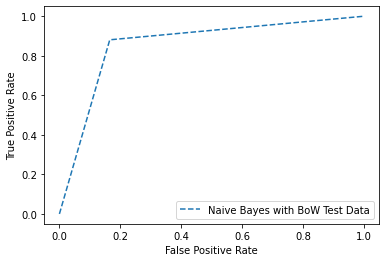

In [36]:
#Lets test the test data

prediction_test_NB_with_bow=mnb_BoW.predict(x_test_bow)

print(metrics.classification_report(y_test_bow, prediction_test_NB_with_bow))
print("Confusion matrix:")
conMatrix_test_nb_bow=metrics.confusion_matrix(y_test_bow, prediction_test_NB_with_bow)
print(conMatrix_test_nb_bow)
print("Accuracy:")
accuracy_test_nb_bow=metrics.accuracy_score(y_test_bow, prediction_test_NB_with_bow)
print(accuracy_test_nb_bow)

print("ROC Curve:")
test_nb_with_bow_fpr, test_nb_with_bow_tpr, thresholds = metrics.roc_curve(y_test_bow, prediction_test_NB_with_bow)
plt.plot(test_nb_with_bow_fpr, test_nb_with_bow_tpr, linestyle='--', label='Naive Bayes with BoW Test Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Naive Bayes with TF-IDF

In [37]:
#Use Multinomial Naive Bayes
mnb_TFIDF = MultinomialNB()
mnb_TFIDF.fit(x_train_tfidf,y_train_tfidf)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     57397
           1       0.88      0.89      0.88     57454

    accuracy                           0.88    114851
   macro avg       0.88      0.88      0.88    114851
weighted avg       0.88      0.88      0.88    114851

Confusion matrix:
[[50444  6953]
 [ 6553 50901]]
Accuracy:
0.8824041584313589
ROC Curve:


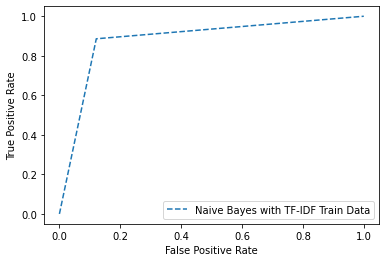

In [38]:
prediction_NB_with_tfidf=mnb_TFIDF.predict(x_train_tfidf)

print(metrics.classification_report(y_train_tfidf,prediction_NB_with_tfidf))
print("Confusion matrix:")
conMatrix_train_nb_tfidf=metrics.confusion_matrix(y_train_tfidf,prediction_NB_with_tfidf)
print(conMatrix_train_nb_tfidf)
print("Accuracy:")
accuracy_train_nb_tfidf=metrics.accuracy_score(y_train_tfidf,prediction_NB_with_tfidf)
print(accuracy_train_nb_tfidf)

print("ROC Curve:")
nb_with_tfidf_fpr, nb_with_tfidf_tpr, thresholds = metrics.roc_curve(y_train_tfidf, prediction_NB_with_tfidf)
plt.plot(nb_with_tfidf_fpr, nb_with_tfidf_tpr, linestyle='--', label='Naive Bayes with TF-IDF Train Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     24640
           1       0.86      0.87      0.86     24583

    accuracy                           0.86     49223
   macro avg       0.86      0.86      0.86     49223
weighted avg       0.86      0.86      0.86     49223

Confusion matrix:
[[21199  3441]
 [ 3273 21310]]
Accuracy:
0.8636003494301444
ROC Curve:


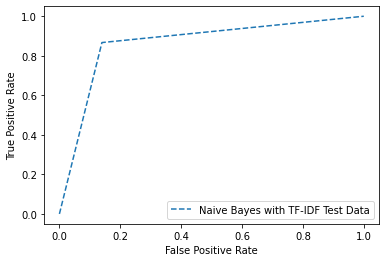

In [39]:
#Lets test the test data

prediction_test_NB_with_tfidf=mnb_TFIDF.predict(x_test_tfidf)

print(metrics.classification_report(y_test_tfidf, prediction_test_NB_with_tfidf))
print("Confusion matrix:")
conMatrix_test_nb_tfidf=metrics.confusion_matrix(y_test_tfidf, prediction_test_NB_with_tfidf)
print(conMatrix_test_nb_tfidf)
print("Accuracy:")
accuracy_test_nb_tfidf=metrics.accuracy_score(y_test_tfidf, prediction_test_NB_with_tfidf)
print(accuracy_test_nb_tfidf)

print("ROC Curve:")
test_nb_with_tfidf_fpr, test_nb_with_tfidf_tpr, thresholds = metrics.roc_curve(y_test_tfidf, prediction_test_NB_with_tfidf)
plt.plot(test_nb_with_tfidf_fpr, test_nb_with_tfidf_tpr, linestyle='--', label='Naive Bayes with TF-IDF Test Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Logistic regression with Bag of Words

In [40]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_bow,y_train_bow)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     57397
           1       0.93      0.93      0.93     57454

    accuracy                           0.93    114851
   macro avg       0.93      0.93      0.93    114851
weighted avg       0.93      0.93      0.93    114851

Confusion matrix:
[[53383  4014]
 [ 3783 53671]]
Accuracy:
0.9321120408181035
ROC Curve:


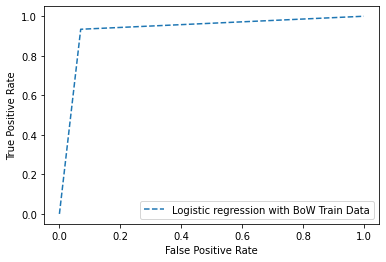

In [41]:
prediction_lr_with_bow=lr.predict(x_train_bow)

print(metrics.classification_report(y_train_bow,prediction_lr_with_bow))
print("Confusion matrix:")
conMatrix_train_lr_bow=metrics.confusion_matrix(y_train_bow,prediction_lr_with_bow)
print(conMatrix_train_lr_bow)
print("Accuracy:")
accuracy_train_lr_bow=metrics.accuracy_score(y_train_bow,prediction_lr_with_bow)
print(accuracy_train_lr_bow)

print("ROC Curve:")
lr_with_bow_fpr, lr_with_bow_tpr, thresholds = metrics.roc_curve(y_train_bow, prediction_lr_with_bow)
plt.plot(lr_with_bow_fpr, lr_with_bow_tpr, linestyle='--', label='Logistic regression with BoW Train Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     24640
           1       0.89      0.90      0.90     24583

    accuracy                           0.90     49223
   macro avg       0.90      0.90      0.90     49223
weighted avg       0.90      0.90      0.90     49223

Confusion matrix:
[[22021  2619]
 [ 2536 22047]]
Accuracy:
0.8952725351969608
ROC Curve:


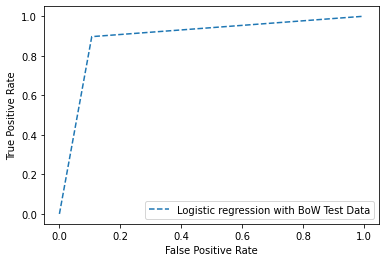

In [42]:
#Lets test the test data

prediction_test_lr_with_bow=lr.predict(x_test_bow)

print(metrics.classification_report(y_test_bow, prediction_test_lr_with_bow))
print("Confusion matrix:")
conMatrix_test_lr_bow=metrics.confusion_matrix(y_test_bow, prediction_test_lr_with_bow)
print(conMatrix_test_lr_bow)
print("Accuracy:")
accuracy_test_lr_bow=metrics.accuracy_score(y_test_bow, prediction_test_lr_with_bow)
print(accuracy_test_lr_bow)

print("ROC Curve:")
test_lr_with_bow_fpr, test_lr_with_bow_tpr, thresholds = metrics.roc_curve(y_test_bow, prediction_test_lr_with_bow)
plt.plot(test_lr_with_bow_fpr, test_lr_with_bow_tpr, linestyle='--', label='Logistic regression with BoW Test Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Logistic regression with TF-IDF

In [43]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     57397
           1       0.91      0.90      0.91     57454

    accuracy                           0.91    114851
   macro avg       0.91      0.91      0.91    114851
weighted avg       0.91      0.91      0.91    114851

Confusion matrix:
[[52202  5195]
 [ 5633 51821]]
Accuracy:
0.9057213258918076
ROC Curve:


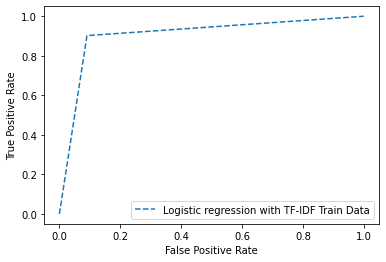

In [44]:
prediction_lr_with_tfidf=lr.predict(x_train_tfidf)

print(metrics.classification_report(y_train_tfidf,prediction_lr_with_tfidf))
print("Confusion matrix:")
conMatrix_train_lr_tfidf=metrics.confusion_matrix(y_train_tfidf,prediction_lr_with_tfidf)
print(conMatrix_train_lr_tfidf)
print("Accuracy:")
accuracy_train_lr_tfidf=metrics.accuracy_score(y_train_tfidf,prediction_lr_with_tfidf)
print(accuracy_train_lr_tfidf)

print("ROC Curve:")
lr_with_tfidf_fpr, lr_with_tfidf_tpr, thresholds = metrics.roc_curve(y_train_tfidf, prediction_lr_with_tfidf)
plt.plot(lr_with_tfidf_fpr, lr_with_tfidf_tpr, linestyle='--', label='Logistic regression with TF-IDF Train Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     24640
           1       0.89      0.89      0.89     24583

    accuracy                           0.89     49223
   macro avg       0.89      0.89      0.89     49223
weighted avg       0.89      0.89      0.89     49223

Confusion matrix:
[[22076  2564]
 [ 2742 21841]]
Accuracy:
0.8922048635800337
ROC Curve:


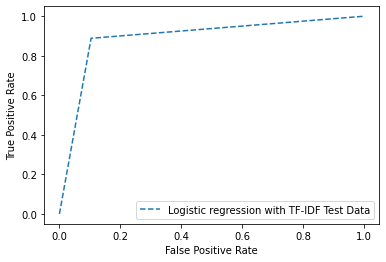

In [45]:
#Lets test the test data

prediction_test_lr_with_tfidf=lr.predict(x_test_tfidf)

print(metrics.classification_report(y_test_tfidf, prediction_test_lr_with_tfidf))
print("Confusion matrix:")
conMatrix_test_lr_tfidf=metrics.confusion_matrix(y_test_tfidf, prediction_test_lr_with_tfidf)
print(conMatrix_test_lr_tfidf)
print("Accuracy:")
accuracy_test_lr_tfidf=metrics.accuracy_score(y_test_tfidf, prediction_test_lr_with_tfidf)
print(accuracy_test_lr_tfidf)

print("ROC Curve:")
test_lr_with_tfidf_fpr, test_lr_with_tfidf_tpr, thresholds = metrics.roc_curve(y_test_tfidf, prediction_test_lr_with_tfidf)
plt.plot(test_lr_with_tfidf_fpr, test_lr_with_tfidf_tpr, linestyle='--', label='Logistic regression with TF-IDF Test Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Comparing Results

### Accuracy

In [46]:
# Accurracy:

print("\t\t\t\t\t-----Accuracy-----")
print("Naive Bayes with Bag of Words")
print("  Train: ",accuracy_train_nb_bow)
print("  Test: ",accuracy_test_nb_bow)
print()

print("Naive Bayes with TF-IDF")
print("  Train: ",accuracy_train_nb_tfidf)
print("  Test: ",accuracy_test_nb_tfidf)
print()

print("Logistic regression with Bag of Words")
print("  Train: ",accuracy_train_lr_bow)
print("  Test: ",accuracy_test_lr_bow)
print()

print("Logistic regression with TF-IDF")
print("  Train: ",accuracy_train_lr_tfidf)
print("  Test: ",accuracy_test_lr_tfidf)
print()

					-----Accuracy-----
Naive Bayes with Bag of Words
  Train:  0.876448616032947
  Test:  0.857668163257014

Naive Bayes with TF-IDF
  Train:  0.8824041584313589
  Test:  0.8636003494301444

Logistic regression with Bag of Words
  Train:  0.9321120408181035
  Test:  0.8952725351969608

Logistic regression with TF-IDF
  Train:  0.9057213258918076
  Test:  0.8922048635800337



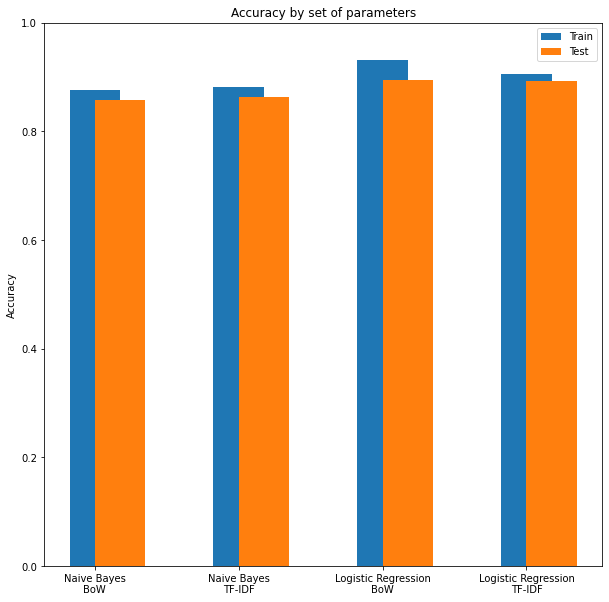

In [47]:
labels=['Naive Bayes\nBoW','Naive Bayes\nTF-IDF','Logistic Regression\nBoW','Logistic Regression\nTF-IDF']
train_values=[accuracy_train_nb_bow,accuracy_train_nb_tfidf,accuracy_train_lr_bow,accuracy_train_lr_tfidf]
test_values=[accuracy_test_nb_bow,accuracy_test_nb_tfidf,accuracy_test_lr_bow,accuracy_test_lr_tfidf]

width = 0.35
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

ax.bar(labels, train_values, width, label='Train')
ax.bar(labels, test_values, width,align='edge', label='Test')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by set of parameters')
ax.set(ylim=(0, 1))
ax.legend()
plt.show()

### Confusion matrix:

In [48]:
print("\t\t\t\t\t-----Confusion Matrix-----")
print("Naive Bayes with Bag of Words")
print("  Train:\n",conMatrix_train_nb_bow)
print("  Test: \n",conMatrix_test_nb_bow)
print()

print("Naive Bayes with TF-IDF")
print("  Train: \n",conMatrix_train_nb_tfidf)
print("  Test: \n",conMatrix_test_nb_tfidf)
print()

print("Logistic regression with Bag of Words")
print("  Train: \n",conMatrix_train_lr_bow)
print("  Test: \n",conMatrix_test_lr_bow)
print()

print("Logistic regression with TF-IDF")
print("  Train: \n",conMatrix_train_lr_tfidf)
print("  Test: \n",conMatrix_test_lr_tfidf)
print()

					-----Confusion Matrix-----
Naive Bayes with Bag of Words
  Train:
 [[49136  8261]
 [ 5929 51525]]
  Test: 
 [[20565  4075]
 [ 2931 21652]]

Naive Bayes with TF-IDF
  Train: 
 [[50444  6953]
 [ 6553 50901]]
  Test: 
 [[21199  3441]
 [ 3273 21310]]

Logistic regression with Bag of Words
  Train: 
 [[53383  4014]
 [ 3783 53671]]
  Test: 
 [[22021  2619]
 [ 2536 22047]]

Logistic regression with TF-IDF
  Train: 
 [[52202  5195]
 [ 5633 51821]]
  Test: 
 [[22076  2564]
 [ 2742 21841]]



### ROC Curve:

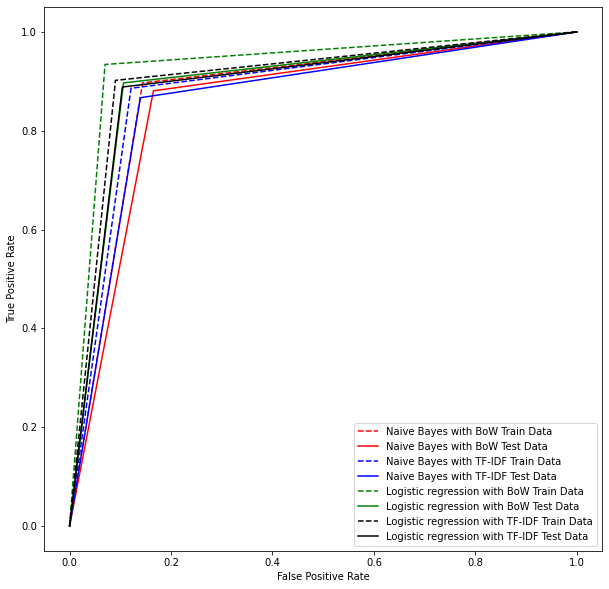

In [49]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.plot(nb_with_bow_fpr, nb_with_bow_tpr, color ='r', linestyle='--', label='Naive Bayes with BoW Train Data')
plt.plot(test_nb_with_bow_fpr, test_nb_with_bow_tpr, color ='r', linestyle='solid', label='Naive Bayes with BoW Test Data')
plt.plot(nb_with_tfidf_fpr, nb_with_tfidf_tpr, color ='b', linestyle='--', label='Naive Bayes with TF-IDF Train Data')
plt.plot(test_nb_with_tfidf_fpr, test_nb_with_tfidf_tpr, color ='b', linestyle='solid', label='Naive Bayes with TF-IDF Test Data')
plt.plot(lr_with_bow_fpr, lr_with_bow_tpr, color ='g', linestyle='--', label='Logistic regression with BoW Train Data')
plt.plot(test_lr_with_bow_fpr, test_lr_with_bow_tpr, color ='g', linestyle='solid', label='Logistic regression with BoW Test Data')
plt.plot(lr_with_tfidf_fpr, lr_with_tfidf_tpr, color ='black', linestyle='--', label='Logistic regression with TF-IDF Train Data')
plt.plot(test_lr_with_tfidf_fpr, test_lr_with_tfidf_tpr, color ='black', linestyle='solid', label='Logistic regression with TF-IDF Test Data')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
